# Extraindo as Letras da Discografia da JADE

Jade Amelia Thirlwall (South Shields, 26 de dezembro de 1992) é uma cantora, compositora, empresária e ativista britânica. Ela é mais conhecida por ser integrante do grupo feminino Little Mix. Jade ascendeu à fama após ganhar a oitava temporada do talent show The X Factor no canal de televisão ITV.

Em abril de 2019, a cantora assinou um contrato com a Sony Music como uma compositora oficial. Thirlwall já foi responsável por escrever canções para artistas como Britney Spears, Billy Porter e para o grupo sul-coreano TWICE. É embaixadora da caridade Stonewall Youth Pride de Manchester, onde ajuda à apoiar pessoas LGBTQ. Em 2020 foi responsável por abrir seu próprio restaurante em sua cidade de nascimento intitulado Arbeia.

A cantora em conjunto do grupo conseguiu uma fortuna de aproximadamente £66.7 milhões de libras esterlinas e ficaram na lista entre as maiores celebridades mais bem pagas de seu país (por quatro anos consecutivos desde 2016) e segundo a revista inglesa Debrette elas se tornaram uma das personalidades de maior influência no Reino Unido.

Sua estreia solo ocorreu no ano de 2024 em 19 de julho com o single intitulado Angel of My Dreams alcançando a posiçao número 7 na UK Singles Charts e ganhando aclamação crítica e sua primeira indicação no Brit Awards 2025. Além de seu trabalho solo, ela co-escreveu canções para vários artistas através de seu contrato de publicação com a Sony/ATV Music. eu envolvimento com trabalhos de caridade lhe rendeu o Gay Times Honor for Allyship em 2021.

Mais informações no link: https://pt.wikipedia.org/wiki/Jade_Thirlwall

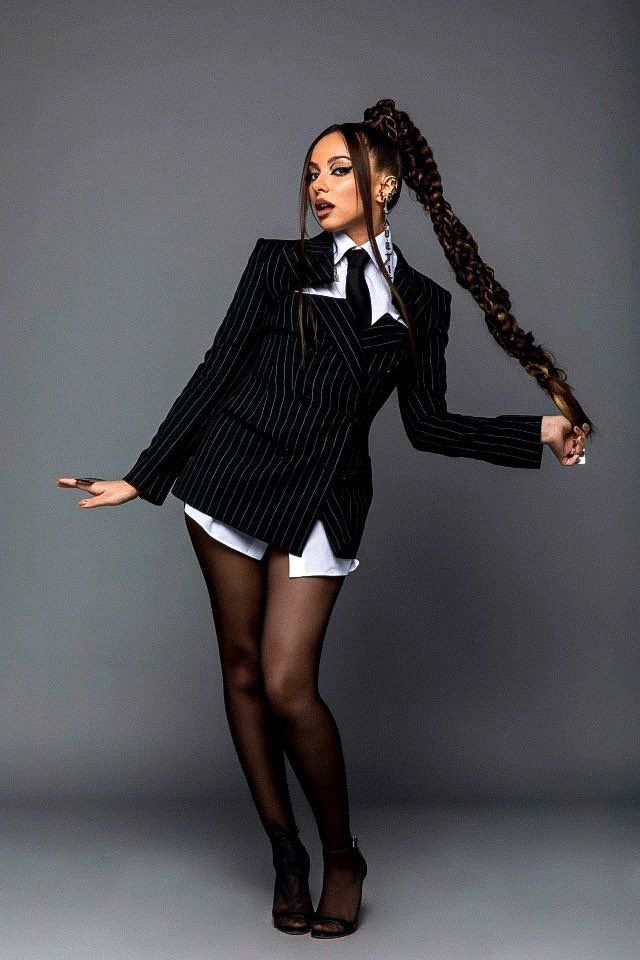

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

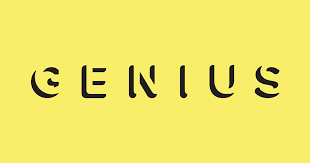

In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "rkmYPIURaV9uyAXm8OhBNkDG_bGgeYFP_UDFfasHS0b_sxPWz2PrBJR8Rmcdzhhr"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Jade Thirlwall", max_songs=5)

Searching for songs by Jade Thirlwall...

Changing artist name to 'JADE'
Song 1: "Angel Of My Dreams"
Song 2: "IT girl"
Song 3: "FUFN (Fuck You For Now)"
Song 4: "Fantasy"
Song 5: "Midnight Cowboy"

Reached user-specified song limit (5).
Done. Found 5 songs.


In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_JADE.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_JADE.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,release_year
0,Angel Of My Dreams,[Intro]\nI wonder if one day that you'll say t...,2024-07-19,2024
1,IT girl,"[Intro]\nThrow me them roses\nWell, that's jus...",2025-01-10,2025
2,FUFN (Fuck You For Now),[Intro]\n(Ah)\n\n[Verse 1]\nYou always think y...,2025-03-14,2025
3,Fantasy,[Intro]\n(Hahaha)\nAh-ah\nI need to\nI need to...,2024-10-18,2024
4,Midnight Cowboy,[Intro: Ncuti Gatwa & JADE]\nLadies and gentle...,2024-09-25,2024


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("JADELyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('JADE.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Angel Of My Dreams',
  ' wonder care mike somethin crazy love madly refrain angel dreams always love hate fair bittersweet always want need care interlude care care  care care funny care care care money money sellin soul psycho they lucky better like lucky honey  feels nice spotlight when camera flashy happy heaven lookin  dreams always love hate fair bitt rsweet always want need care love call star dark want need care fair post  fair fair  fair fair grind fair sushi house suit gucci never knew  feels nice feels nice spotlight spotlight when camera flashy happy heaven lookin  angel dreams always love hate fair bittersweet always want need care love call star dark want need care fair post  fair refrain angel dreams wonder care always love hate fair bittersweet always love forever swear always want need care  always love',
  '2024-07-19 00:00:00',
  2024,
  143),
 ('IT girl',
  ' throw roses well that showbiz baby sugarcoat make feel sick refrain girl girl shit girl shit girl whole wo